In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

75.0


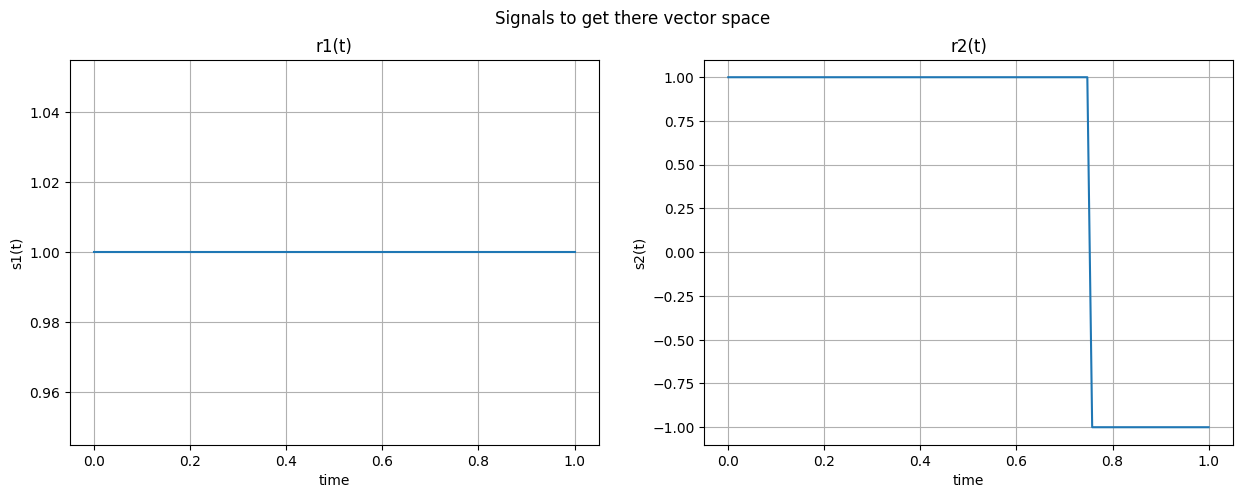

In [2]:
# 1. Generating s1 and s2 :D
samples=100
print(0.75*samples)
t=np.linspace(0, 1, samples)
r1=np.ones(samples) #r1 is sampled signals of s1 shown in document
r2=np.array(np.ones(samples)) #r1 is sampled signals of s1 shown in document
r2[int(0.75*samples):]=-1



# Initialise the subplot function using number of rows and columns
figure, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

figure.suptitle('Signals to get there vector space')

ax1.grid()
ax1.set_title('r1(t)')
ax1.set_xlabel('time')
ax1.set_ylabel('s1(t)')

ax2.set_title('r2(t)')
ax2.set_xlabel('time')
ax2.set_ylabel('s2(t)')
ax2.grid()


#Plot s1
ax1.plot(t, r1)
# Plot s2
ax2.plot(t, r2)

plt.show()

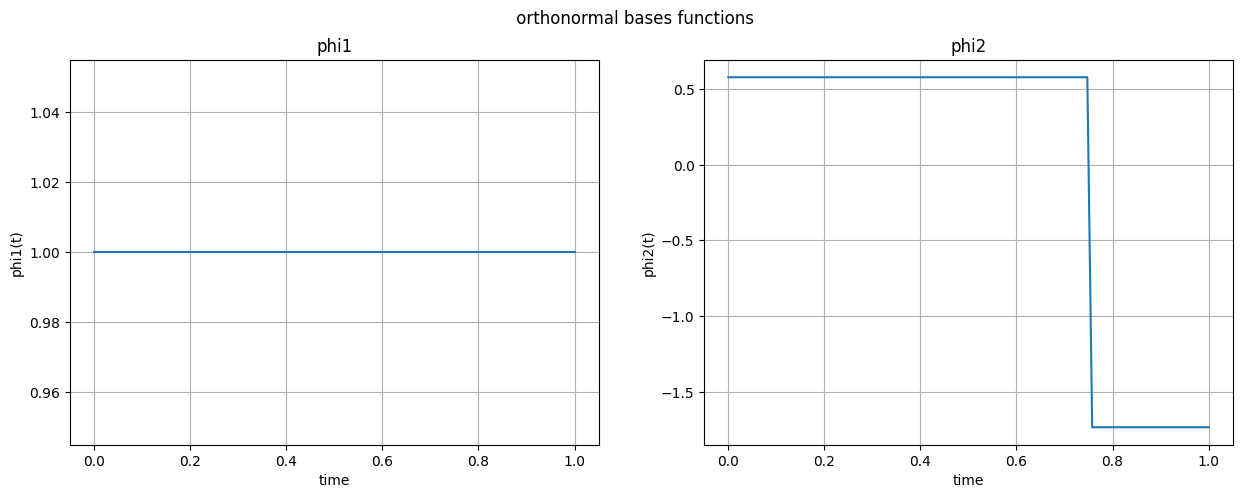

In [3]:

def GM_Bases(s1,s2):
    '''
    The function calculates the Gram-Schmidt orthonormal bases functions (phi1 & phi 2) for two input signals (s1 & s2)
    '''
    # Getting phi1
    # s1=s11* phi1
    # s11=root(E1)
    E1=np.sum(s1**2)/samples
    s11=math.sqrt(E1)
    phi1=s1/s11


    # Getting phi2
    # s2= s21*phi1 + s22*phi2
    # Getting s21 =intg(0-T)(s2 phi1) 4
    s21=np.sum(s2*phi1)/samples
    # s22 phi2=s2-s21 phi1 = g2(t)
    # computing s22=root(E2)
    g2=s2-s21*phi1
    E2=np.sum(g2**2)/samples
    s22=math.sqrt(E2)
    phi2=g2/s22

    return phi1,phi2

phi1,phi2=GM_Bases(r1,r2)

#plot orthonormal bases functions 😉
figure, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

figure.suptitle(' orthonormal bases functions')

ax1.grid()
ax1.set_title('phi1')
ax1.set_xlabel('time')
ax1.set_ylabel('phi1(t)')

ax2.set_title('phi2')
ax2.set_xlabel('time')
ax2.set_ylabel('phi2(t)')
ax2.grid()


#Plot s1
ax1.plot(t, phi1)
# Plot s2
ax2.plot(t, phi2)

plt.show()

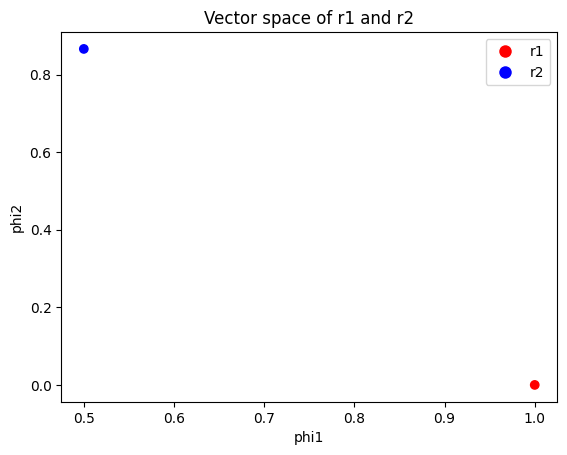

In [4]:
def signal_space(s, phi1, phi2):
    '''The function calculates the signal space representation of input signal s over the 
    orthonormal bases functions (phi1 & phi 2)'''

    # si=si1*phi1 + si2*phi2
    # step 1 compute si1=intg 0-T si*phi1
    si1 = np.sum(s*phi1)/samples

    # step 2 compute si2
    # si2 * phi2=si-si1*phi1=g2
    # si2 = intg 0-T g2*phi2
    g2 = s-si1*phi1
    si2 = np.sum(g2*phi2)/samples

    return [si1, si2]


# Test this function by passing s1 and s2 to it 🤔
v_1 = signal_space(r1, phi1, phi2)
assert v_1 == [1.0, 0.0], "Error:Vector space representation of s1 is wrong"

# plot vector space of s1 and s2

v_2 = signal_space(r2, phi1, phi2)
v_2 = ['%.3f' % v for v in v_2]
v_2 = [float(x) for x in v_2]
assert v_2 == [
    0.500, 0.866], "Error:Vector space representation of s2 is wrong"


# # Set the width of the plot
# fig = plt.gcf()
# fig.set_size_inches(10, 5)


# Set axis labels and title
plt.xlabel('phi1')
plt.ylabel('phi2')
plt.title('Vector space of r1 and r2')

# plt.
plt.scatter([v_1[0],v_2[0]], [v_1[1],v_2[1]], c=['r','b'])

# Legend
# Create a custom legend for the colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='r1',
                              markerfacecolor='r', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='r2',
                              markerfacecolor='b', markersize=10)]

# Add the legend to the plot
plt.legend(handles=legend_elements)


# Show the plot
plt.show()


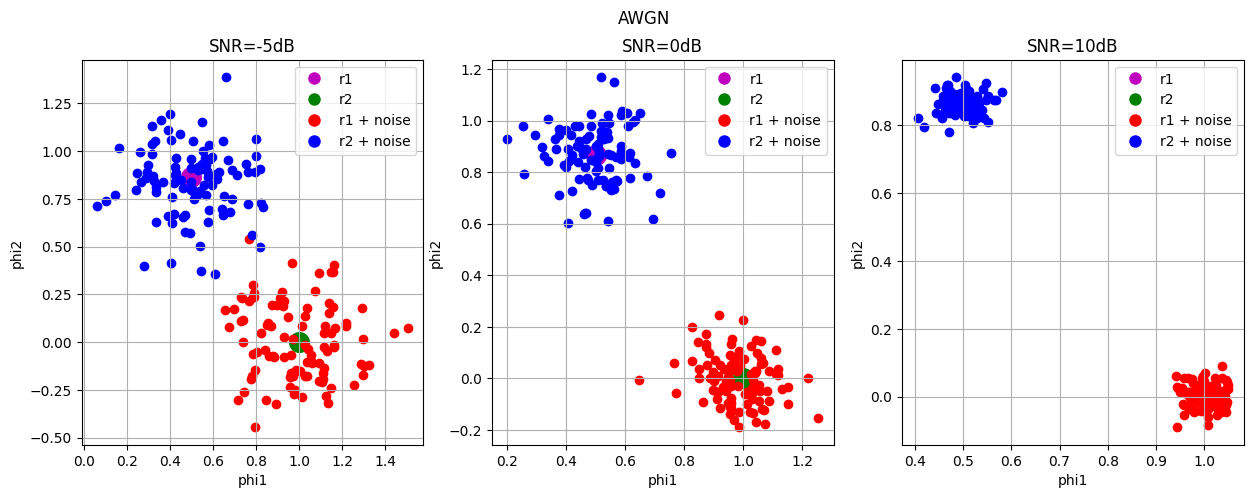

In [13]:
def AWGN(s,snr):
    '''
    s: signal to which we want to add noise :(
    snr: Signal to noise ratio in db
    no_samples: for the noise generated

    '''
    #Generate AWGN
    #Where 𝑤(𝑡) is a zero mean AWGN with variance 𝜎^2
    # SNR=E/𝜎^2   E: Energy of the signal and 𝜎^2 is variance of noise 
    mu=0
    E=np.sum(s**2)/len(s)


    # Variance of Noise Signal
    # SNR = 10 log (E ÷ 𝜎^2)
    var=E/(10**(snr/10))

    # Standard Deviation of the noise Signal
    std=math.sqrt(var)
    # genrating AWGN of samples = samples for r1 and r2
    gaussian_noise=np.random.normal(mu, std, size = len(s))

    # Add this noise to input signal to be noisy
    s_noisy=s+gaussian_noise

    return s_noisy



#plot AWGN 🔈🔈
figure, axes = plt.subplots(1, 3, figsize=(15, 5))


figure.suptitle('AWGN')

axes[0].grid()
axes[1].grid()
axes[2].grid()

axes[0].set_title('SNR=-5dB')
axes[0].set_xlabel('phi1')
axes[0].set_ylabel('phi2')

axes[1].set_title('SNR=0dB')
axes[1].set_xlabel('phi1')
axes[1].set_ylabel('phi2')


axes[2].set_title('SNR=10dB')
axes[2].set_xlabel('phi1')
axes[2].set_ylabel('phi2')




SNR=[-5,0,10] #Required SNRs to evaluate with in dB :D
index=0
noise_signals_number=100  #No of noise signals to be added to the signals r1 and r2 to see effect of SNR value
for snr in SNR:
    # plot original signal vector space without noise :D

    axes[index].scatter(v_1[0], v_1[1],color='g',marker='o',s=200)
    axes[index].scatter(v_2[0], v_2[1],color='m',marker='o',s=200)

    for j in range(noise_signals_number):
        # for each snr value generate 100 random noises each of samples=samples [same samples no of r1 and r2]
        # Adding AWGN to r1 such that gaussian_noise_r1(𝑡) = r1(𝑡) + 𝑤(𝑡);
        gaussian_noise_r1=AWGN(r1,snr)
        # Adding AWGN to r2 such that gaussian_noise_r2(𝑡) = r2(𝑡) + 𝑤(𝑡);
        gaussian_noise_r2=AWGN(r2,snr)

        # Project on the space vector
        [si1_1, si2_1]=signal_space(gaussian_noise_r1, phi1, phi2)
        [si1_2, si2_2]=signal_space(gaussian_noise_r2, phi1, phi2)


        # plot this on Scatter diagram
        axes[index].scatter(si1_1,si2_1,color='r')
        axes[index].scatter(si1_2,si2_2,color='b')

    # Legend
    # Create a custom legend for the colors
    legend_elements = [
                    plt.Line2D([0], [0], marker='o', color='w', label='r1',
                                markerfacecolor='m', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='r2',
                                markerfacecolor='g', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='r1 + noise',
                                markerfacecolor='r', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='r2 + noise',
                                markerfacecolor='b', markersize=10)]


    # Add the legend to the plot
    axes[index].legend(handles=legend_elements)
    index+=1
    
plt.show()

### How does the noise affect the signal space?
#### 📝It is clear that the noise makes signal point [representation] in the vector space noisy (scattered around the true value without noise)  


### Does the noise effect increase or decrease with increasing 𝜎2?

#### 📝 It is clear that as snr values increases the effect AEGN on the signal [shift from original value] decreases it is logic bec snr is high means that the signal power is more than that of noise ie. as 𝜎2 increase(snr decrease) the effect of noise decreases